In [1]:
import cv2
from skimage.transform import rescale
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
import skimage
import numpy as np
from skimage import exposure
from joblib import Parallel, delayed
from sklearn.cluster import KMeans
from sklearn import preprocessing

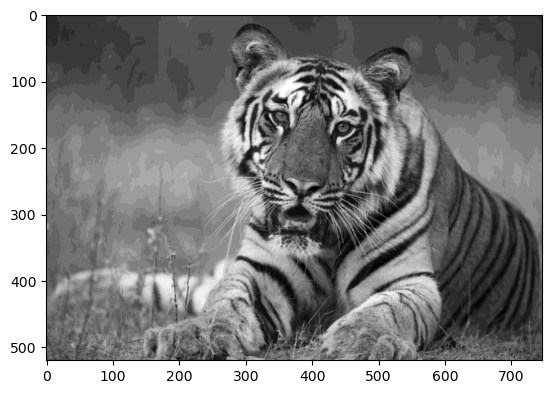

In [130]:
image = cv2.imread('HW04/img2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image_rescaled = (rescale(image_gray, 0.8, anti_aliasing=False)*20).astype('uint8')
plt.imshow(image_rescaled, cmap='gray')

In [131]:
properties = ['dissimilarity', 'correlation', 'contrast', 'energy']

def calc_glcm_all_agls(img, props=properties, dists=[1,5,10], agls=np.arange(0, 2*np.pi, np.pi/4), lvl=21, sym=True, norm=True):
    
    glcm = skimage.feature.graycomatrix(img, 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    feature = []
    glcm_props = [skimage.feature.greycoprops(glcm, name).reshape(-1) for name in props]
    
    return np.array(glcm_props).reshape(-1)



glcm_all_agls = []
for img in [image_rescaled]: 
    glcm_all_agls.append(calc_glcm_all_agls(img,props=properties))

C:\Users\ftmta\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\ftmta\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\ftmta\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\ftmta\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


In [132]:
patch_fa = skimage.util.view_as_windows(image_rescaled,(21,21))

In [133]:
h,w = patch_fa.shape[:2]
patch_fa  = patch_fa.reshape(-1,21,21)

In [134]:
result = []
result.extend(Parallel(n_jobs=10)(delayed(calc_glcm_all_agls)(patch_fa[idx]) for idx in range(patch_fa.shape[0])))

In [135]:
results_array=np.array(result)
results_array = preprocessing.StandardScaler().fit_transform(results_array)

In [136]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(results_array)
kmeans
label = kmeans.fit_predict(results_array)

Text(0.5, 1.0, 'k = 2')

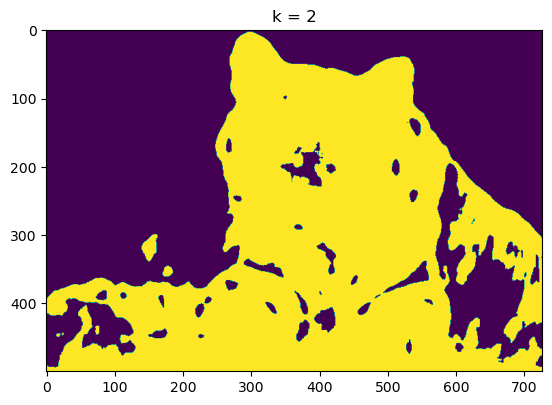

In [140]:
label = label.reshape(h,w)
plt.imshow(label)
plt.title('k = 2')

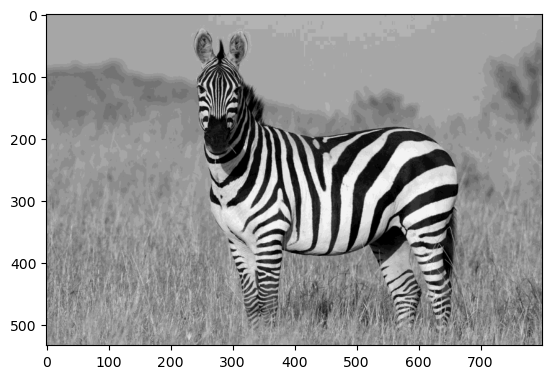

In [142]:
image = cv2.imread('HW04/img1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image_rescaled = (rescale(image_gray, 0.8, anti_aliasing=False)*20).astype('uint8')
plt.imshow(image_rescaled, cmap='gray')

In [143]:
glcm_all_agls = []
for img in [image_rescaled]: 
    glcm_all_agls.append(calc_glcm_all_agls(img,props=properties))

C:\Users\ftmta\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\ftmta\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\ftmta\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\ftmta\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


In [144]:
patch_fa = skimage.util.view_as_windows(image_rescaled,(21,21))

In [145]:
h,w = patch_fa.shape[:2]
patch_fa  = patch_fa.reshape(-1,21,21)

In [146]:
result = []
result.extend(Parallel(n_jobs=10)(delayed(calc_glcm_all_agls)(patch_fa[idx]) for idx in range(patch_fa.shape[0])))

In [147]:
results_array=np.array(result)
results_array = preprocessing.StandardScaler().fit_transform(results_array)

In [148]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(results_array)
kmeans
label = kmeans.fit_predict(results_array)

KMeans(n_clusters=3, random_state=0)

Text(0.5, 1.0, 'k = 3')

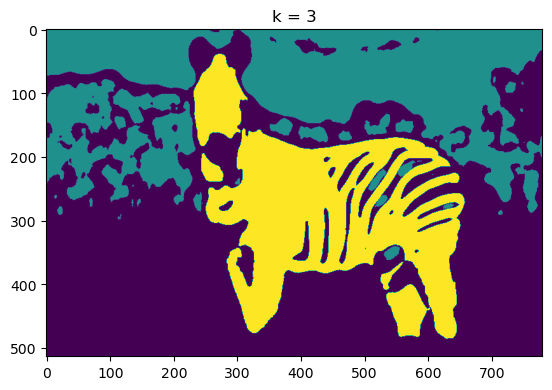

In [151]:
label = label.reshape(h,w)
plt.imshow(label)
plt.title('k = 3')